# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [75]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import math 
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [76]:
df = pd.read_csv('df_train.csv', index_col=0) # load the data
df

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


COMMENT : 
* The dataset was collected across five states in spain comprises of 49 columns and 8763 rows. It consist of both numerical and categorical variables. 
* There is an unnamed column with the same index values, this column is insignificant to use in this case. it will be removed in the data engineering session.


In [77]:
df_test = pd.read_csv('df_test.csv', index_col = 0) # load the data
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [78]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [79]:
#checking the shape of the train dataset
df.shape

(8763, 48)

In [80]:
df_test.shape

(2920, 47)

In [81]:
#assessing the datatype of the train data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [82]:
#checking missing values
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [83]:
df_test.isnull().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

In [84]:
df.duplicated().sum()

0

In [85]:
# plot relevant feature interactions
#plt.figure(figsize=(30,30))
#sns.pairplot(df_train)

In [86]:
#Checking Skewness/Kurtosis and Outliers

In [87]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

<AxesSubplot:>

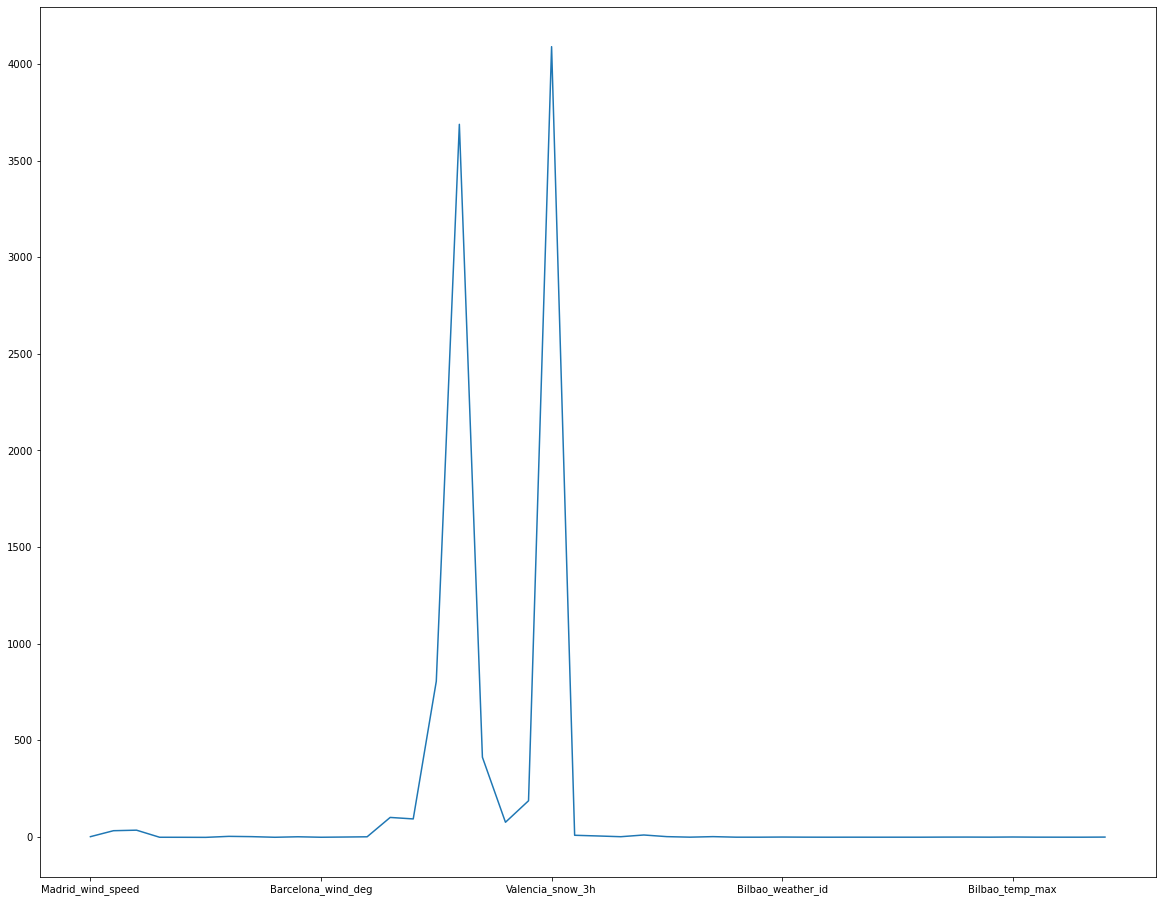

In [88]:
plt.figure(figsize=(20,16))
df.kurtosis().plot()

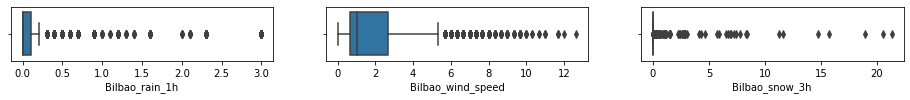

In [89]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df['Bilbao_rain_1h'])
plt.subplot(1,3,2)
sns.boxplot(df['Bilbao_wind_speed'])
plt.subplot(1,3,3)
sns.boxplot(df['Bilbao_snow_3h'])
plt.show()

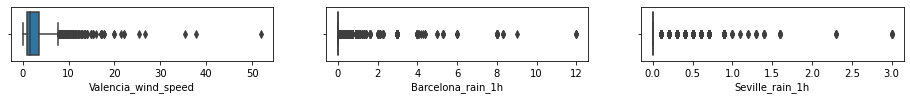

In [90]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df['Valencia_wind_speed'])
plt.subplot(1,3,2)
sns.boxplot(df['Barcelona_rain_1h'])
plt.subplot(1,3,3)
sns.boxplot(df['Seville_rain_1h'])
plt.show()

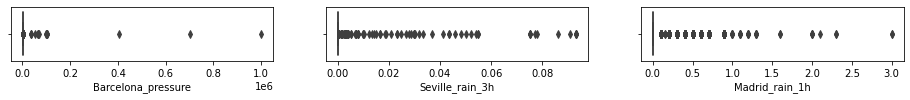

In [91]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df['Barcelona_pressure'])
plt.subplot(1,3,2)
sns.boxplot(df['Seville_rain_3h'])
plt.subplot(1,3,3)
sns.boxplot(df['Madrid_rain_1h'])
plt.show()

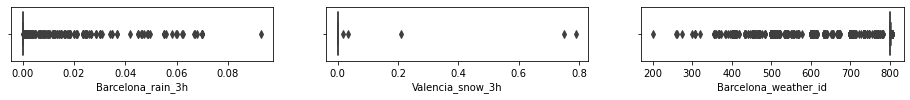

In [92]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df['Barcelona_rain_3h'])
plt.subplot(1,3,2)
sns.boxplot(df['Valencia_snow_3h'])
plt.subplot(1,3,3)
sns.boxplot(df['Barcelona_weather_id'])
plt.show()

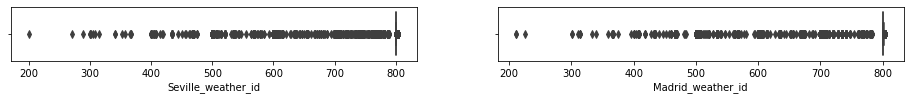

In [93]:
plt.figure(figsize=(16,1))
plt.subplot(1,2,1)
sns.boxplot(df['Seville_weather_id'])
plt.subplot(1,2,2)
sns.boxplot(df['Madrid_weather_id'])
plt.show()

In [94]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (IQR)

Madrid_wind_speed          2.333333
Bilbao_rain_1h             0.100000
Valencia_wind_speed        2.666667
Seville_humidity          37.666667
Madrid_humidity           42.333333
Bilbao_clouds_all         65.000000
Bilbao_wind_speed          2.000000
Seville_clouds_all        20.000000
Bilbao_wind_deg          160.666667
Barcelona_wind_speed       2.333333
Barcelona_wind_deg       141.833333
Madrid_clouds_all         33.333333
Seville_wind_speed         2.333333
Barcelona_rain_1h          0.000000
Seville_rain_1h            0.000000
Bilbao_snow_3h             0.000000
Barcelona_pressure         8.000000
Seville_rain_3h            0.000000
Madrid_rain_1h             0.000000
Barcelona_rain_3h          0.000000
Valencia_snow_3h           0.000000
Madrid_weather_id          0.666667
Barcelona_weather_id       1.000000
Bilbao_pressure           11.000000
Seville_weather_id         0.000000
Valencia_pressure          7.666667
Seville_temp_max          12.837250
Madrid_pressure            9

In [95]:
print (df < (Q1 - 1.5 * IQR)) or (df >(Q3 + 1.5 * IQR))

      Barcelona_pressure  Barcelona_rain_1h  Barcelona_rain_3h  \
0                  False              False              False   
1                  False              False              False   
2                  False              False              False   
3                  False              False              False   
4                  False              False              False   
...                  ...                ...                ...   
8758               False              False              False   
8759               False              False              False   
8760               False              False              False   
8761               False              False              False   
8762               False              False              False   

      Barcelona_temp  Barcelona_temp_max  Barcelona_temp_min  \
0              False               False               False   
1              False               False               False   
2              

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,...,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h,time
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8759,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
df['Barcelona_pressure'] = np.where(df['Barcelona_pressure'] > 1031.0, 1022.0,df['Barcelona_pressure'])

In [97]:
df['Barcelona_pressure'].describe()

count    8763.000000
mean     1017.369071
std         8.642763
min       670.666667
25%      1014.000000
50%      1018.000000
75%      1022.000000
max      1031.000000
Name: Barcelona_pressure, dtype: float64

In [98]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure       596.207749
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

In [99]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure     -15.710850
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

<AxesSubplot:>

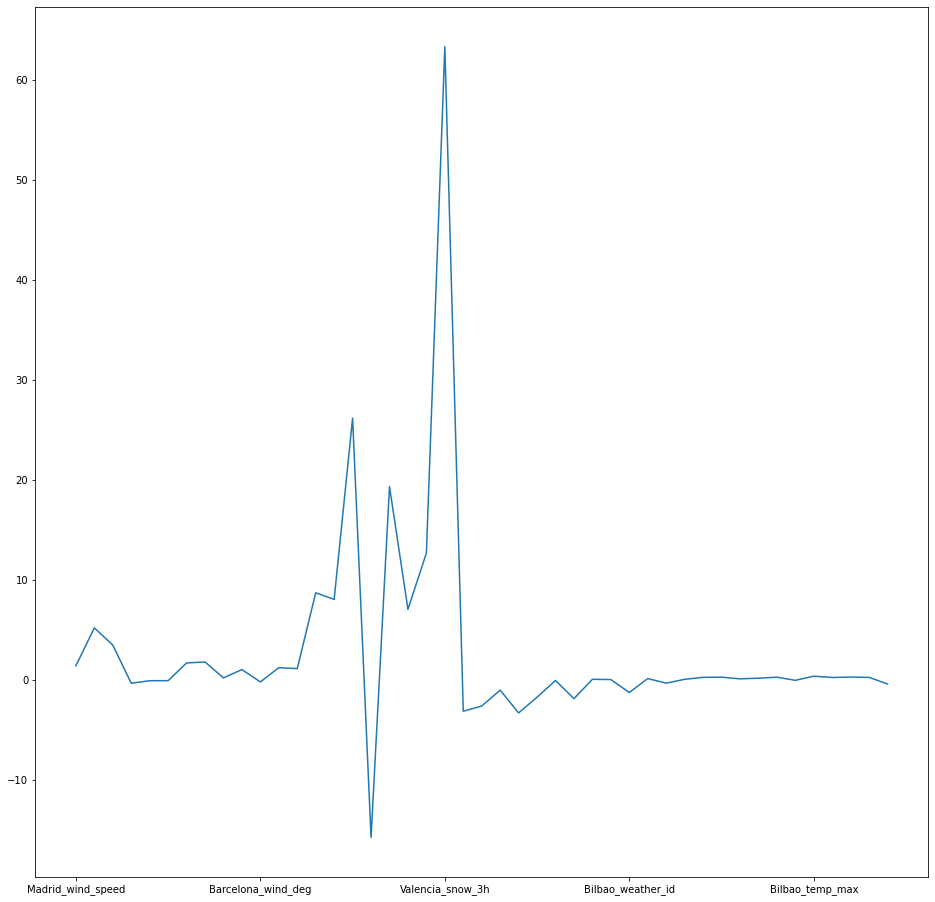

In [100]:
plt.figure(figsize=(16,16))
df.skew().plot()

In [101]:
# evaluate correlation

In [102]:
df.corr().head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536


<AxesSubplot:>

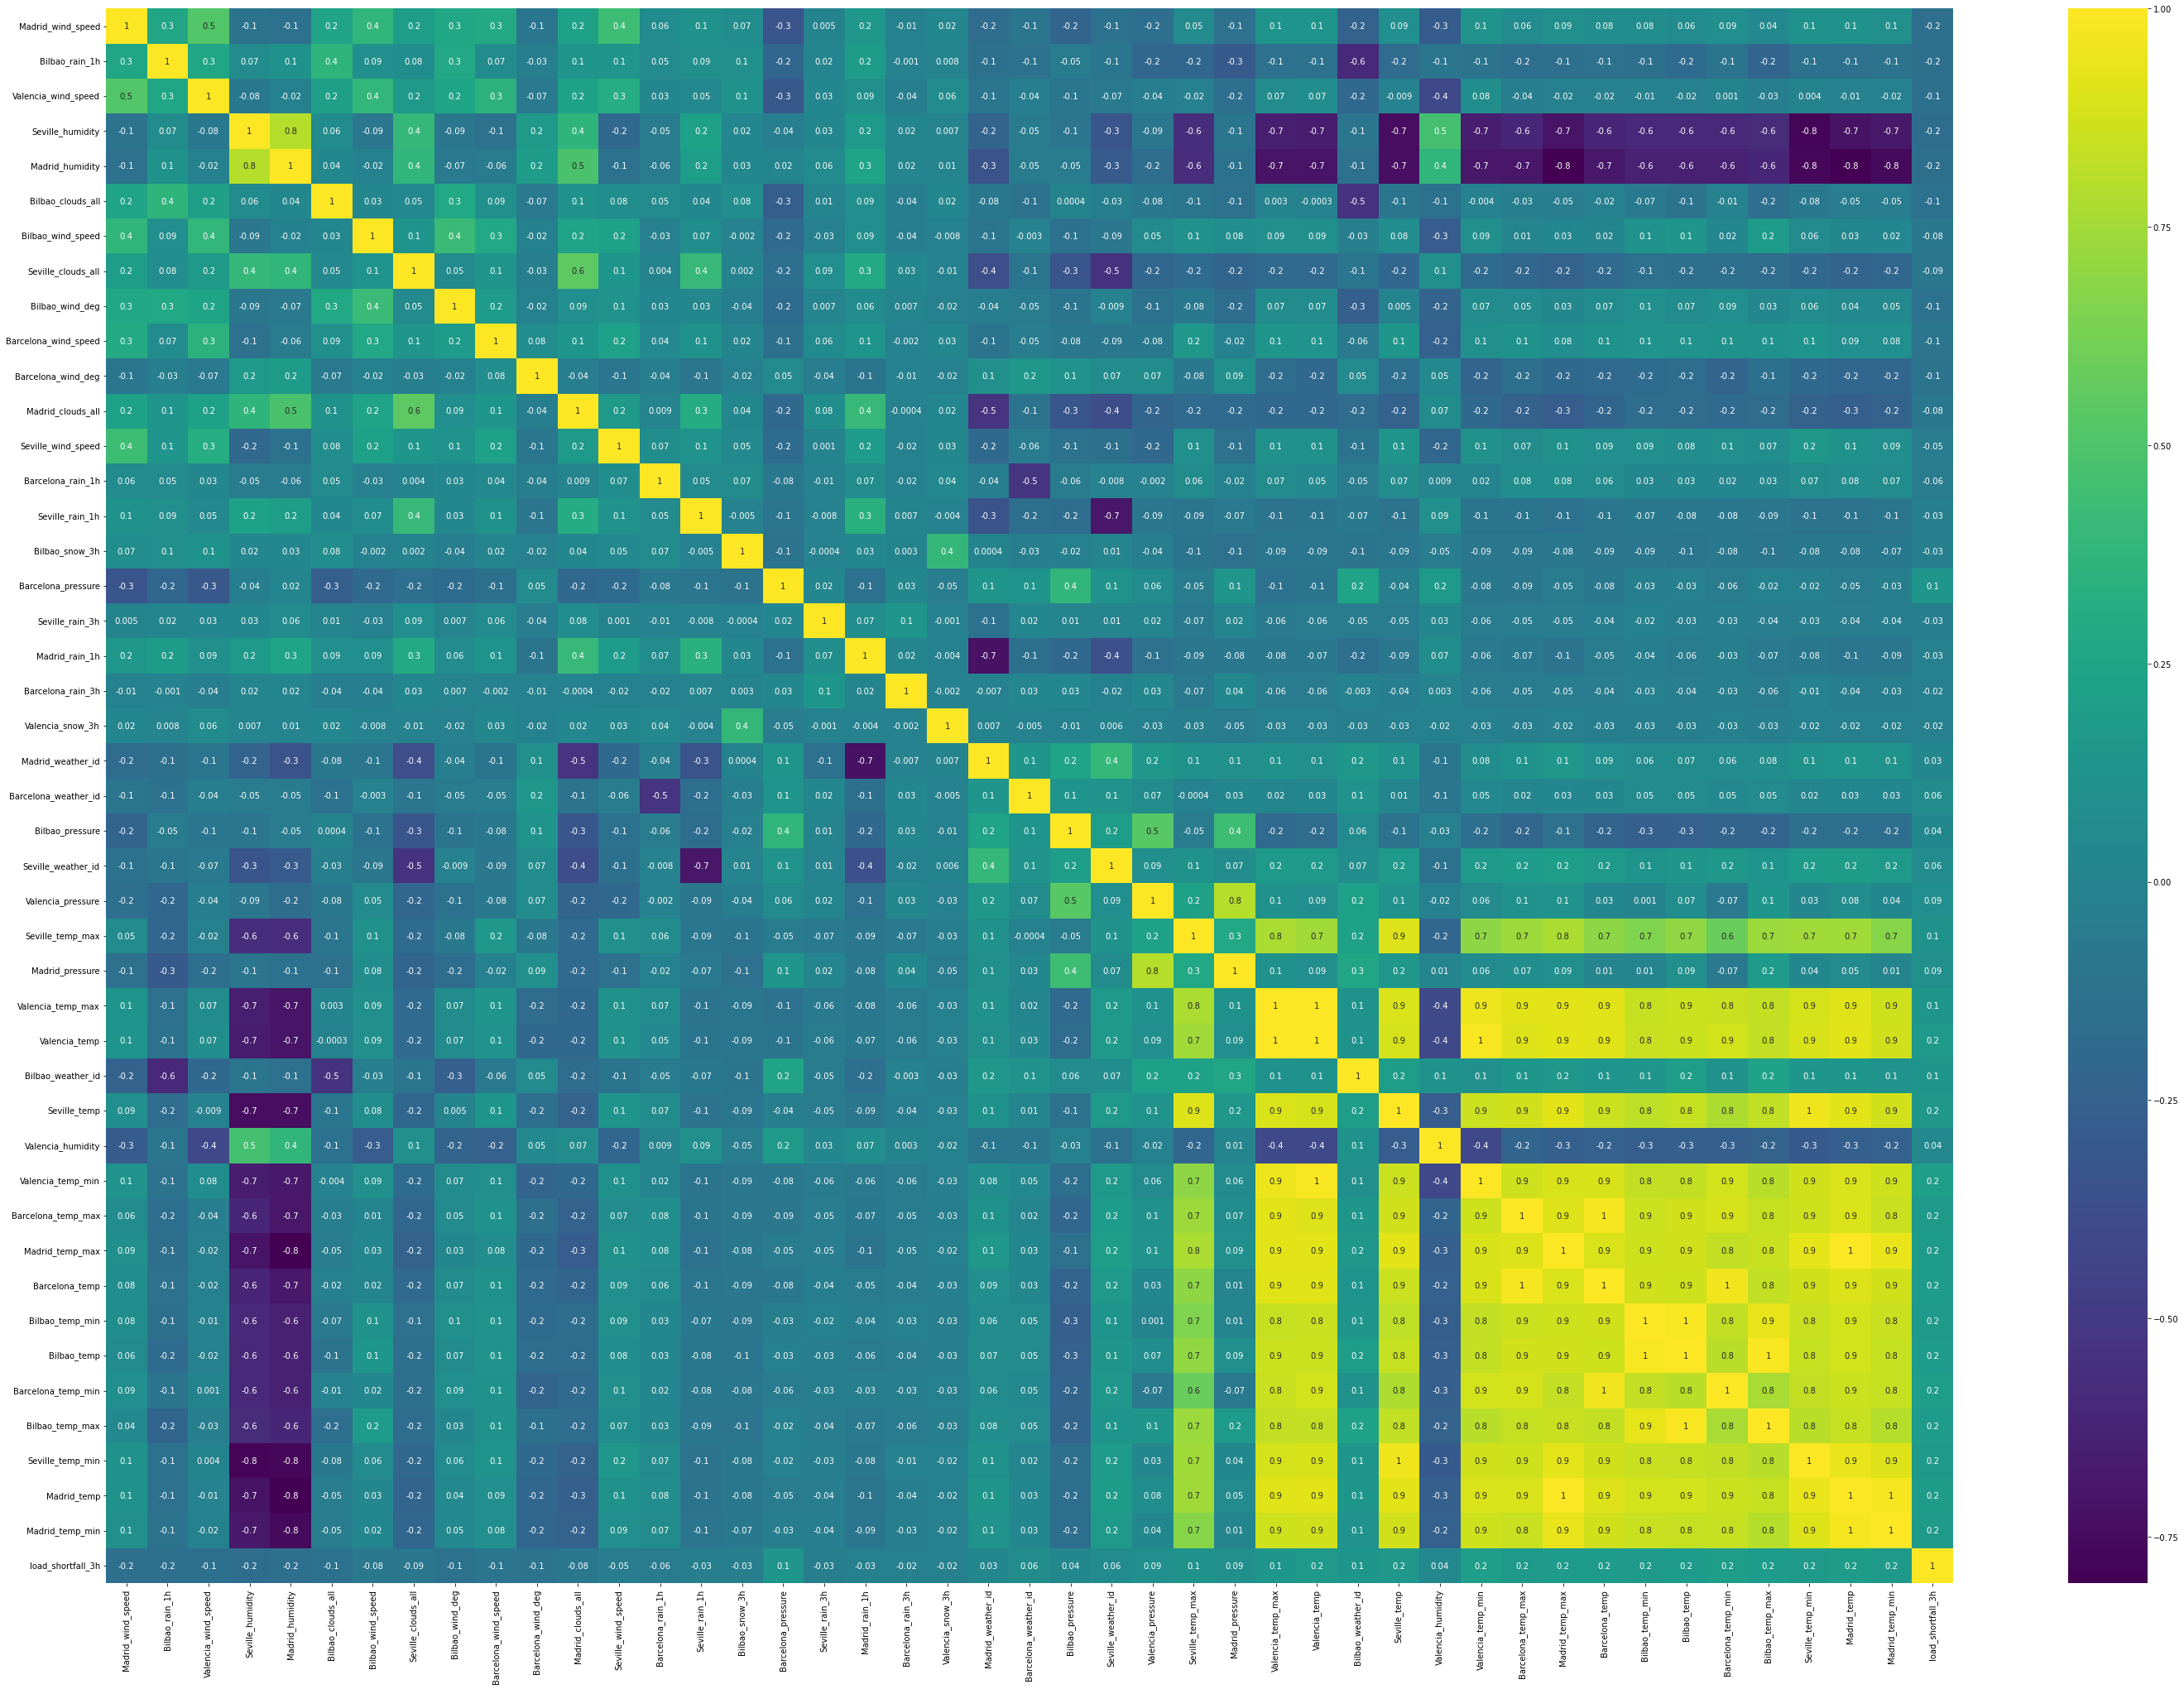

In [103]:
# evaluate correlation
plt.figure(figsize=(50,35))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="viridis", fmt='.1g')

<function matplotlib.pyplot.show(close=None, block=None)>

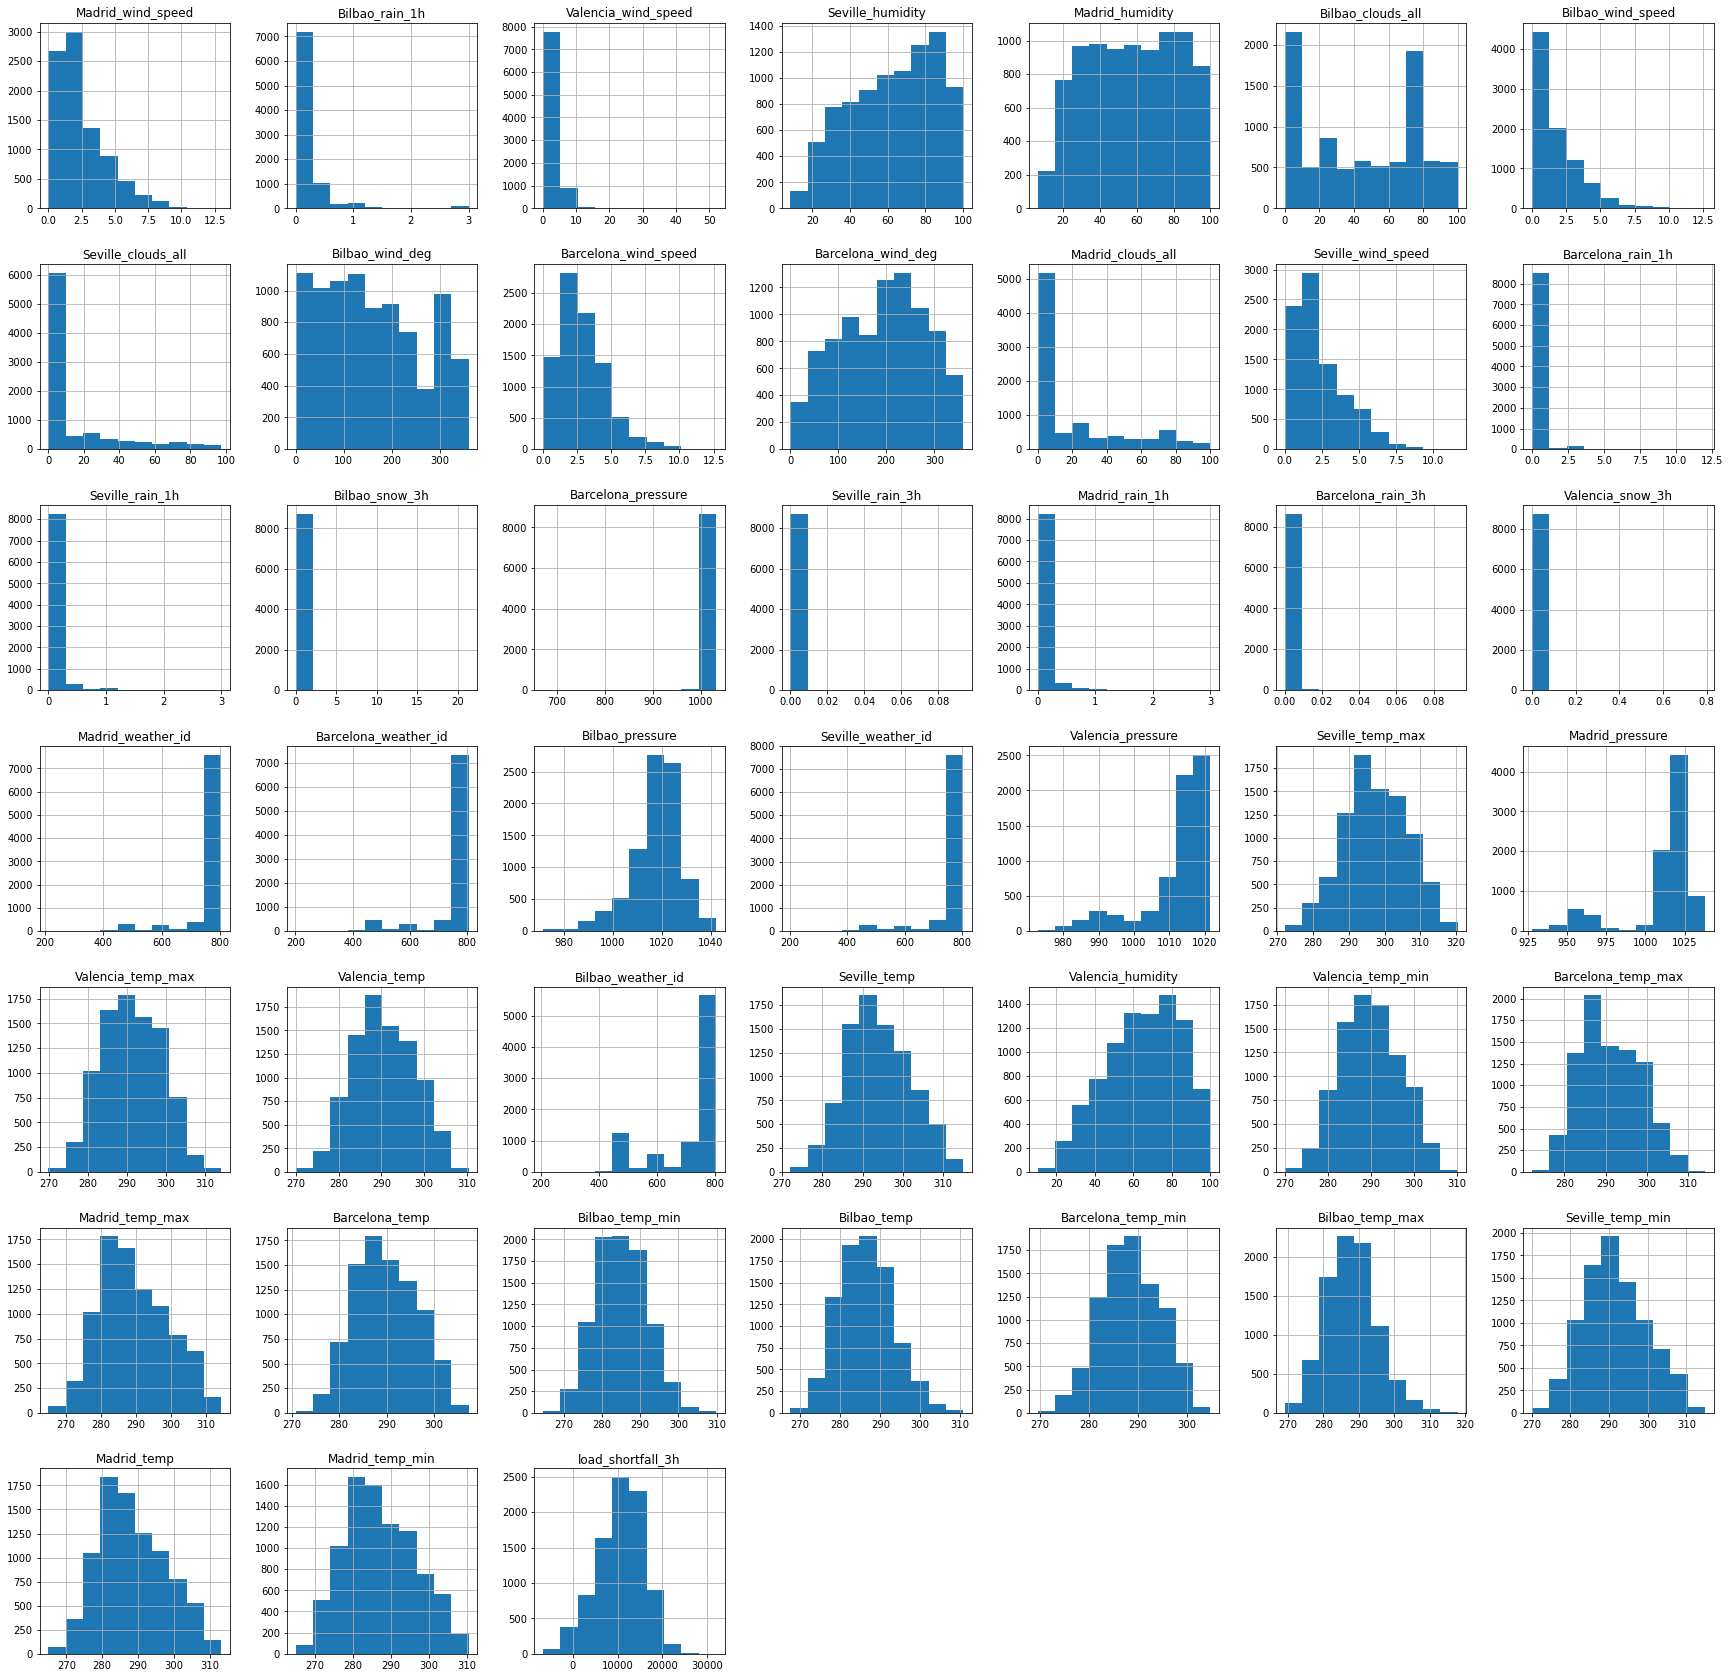

In [104]:
# have a look at feature distributions
df.hist(figsize=(30,30)) 
plt.show

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [105]:
# remove missing values/ features
df_new = df
df_new['Valencia_pressure'].fillna(df_new['Valencia_pressure'].median(), inplace = True)
df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].median(), inplace = True)

In [106]:
#converting categorical variables to numerical
df_new['time'] = pd.to_datetime(df_new['time'])
df_test['time'] = pd.to_datetime(df_test['time'])

In [107]:
df_new["Valencia_wind_deg"] = df_new['Valencia_wind_deg'].str.extract('(\d+)')
df_new['Valencia_wind_deg'] = pd.to_numeric(df_new['Valencia_wind_deg'])

In [108]:
df_test["Valencia_wind_deg"] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])

In [109]:
df_new["Seville_pressure"] = df_new['Seville_pressure'].str.extract('(\d+)')
df_new['Seville_pressure'] = pd.to_numeric(df_new['Seville_pressure'])

In [110]:
df_test["Seville_pressure"] = df_test['Seville_pressure'].str.extract('(\d+)')
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])

In [111]:
df_new['Year']  = df_new['time'].astype('datetime64').dt.year
df_new['Month_of_year']  = df_new['time'].astype('datetime64').dt.month
df_new['Week_of_year'] = df_new['time'].astype('datetime64').dt.weekofyear
df_new['Day_of_year']  = df_new['time'].astype('datetime64').dt.dayofyear
df_new['Day_of_month']  = df_new['time'].astype('datetime64').dt.day
df_new['Day_of_week'] = df_new['time'].astype('datetime64').dt.dayofweek
df_new['Hour_of_week'] = ((df_new['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_new['time'].astype('datetime64').dt.hour)
df_new['Hour_of_day']  = df_new['time'].astype('datetime64').dt.hour

In [112]:
df_test['Year']  = df_test['time'].astype('datetime64').dt.year
df_test['Month_of_year']  = df_test['time'].astype('datetime64').dt.month
df_test['Week_of_year'] = df_test['time'].astype('datetime64').dt.weekofyear
df_test['Day_of_year']  = df_test['time'].astype('datetime64').dt.dayofyear
df_test['Day_of_month']  = df_test['time'].astype('datetime64').dt.day
df_test['Day_of_week'] = df_test['time'].astype('datetime64').dt.dayofweek
df_test['Hour_of_week'] = ((df_test['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_test['time'].astype('datetime64').dt.hour)
df_test['Hour_of_day']  = df_test['time'].astype('datetime64').dt.hour

In [113]:
df_train = df_new.drop('time',axis = 1)

In [114]:
df_test1 = df_test.drop('time', axis = 1)


In [115]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   int64  
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [116]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  2920 non-null   datetime64[ns]
 1   Madrid_wind_speed     2920 non-null   float64       
 2   Valencia_wind_deg     2920 non-null   int64         
 3   Bilbao_rain_1h        2920 non-null   float64       
 4   Valencia_wind_speed   2920 non-null   float64       
 5   Seville_humidity      2920 non-null   float64       
 6   Madrid_humidity       2920 non-null   float64       
 7   Bilbao_clouds_all     2920 non-null   float64       
 8   Bilbao_wind_speed     2920 non-null   float64       
 9   Seville_clouds_all    2920 non-null   float64       
 10  Bilbao_wind_deg       2920 non-null   float64       
 11  Barcelona_wind_speed  2920 non-null   float64       
 12  Barcelona_wind_deg    2920 non-null   float64       
 13  Madrid_clouds_

# engineer existing features

In [117]:
#create standardized data for train and test data
standardized_train = df_train.drop(['load_shortfall_3h'], axis=1)
standardized_test=df_test.drop('time',axis=1)

# create scaler object
scaler = StandardScaler()

# create scaled version of the predictors (there is no need to scale the response)
test_scaled = scaler.fit_transform(standardized_test)
train_scaled = scaler.fit_transform(standardized_train)

# convert the scaled predictor values into a dataframe
standardized_train = pd.DataFrame(train_scaled,columns=standardized_train.columns)
standardized_test = pd.DataFrame(test_scaled,columns=standardized_test.columns)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [118]:
X = df_train.drop(['load_shortfall_3h'], axis=1)
y = df_train['load_shortfall_3h']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3332, random_state=PARAMETER_CONSTANT)

# Linear regression

In [120]:
#lm = LinearRegression()

In [121]:
#lm.fit(X_train, y_train)

In [122]:
#preds =lm.predict(X_test)

# Random forest

In [123]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5)

In [124]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [125]:
y_pred = rf.predict(X_test)

# XB boost

In [126]:
XB=xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                        max_depth = 100, alpha = 10, n_estimators = 100)
XB.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, ...)

In [127]:
y_pred_XB=XB.predict(X_test)

In [128]:
results_dict = {'Test RMSE':
                    {
                       #"Linear regression": np.sqrt(metrics.mean_squared_error(y_test, preds)),
                        #"Decision tree": np.sqrt(metrics.mean_squared_error(y_test_tree, y_pred1)),
                        "Random Forest": np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
                        "XGB":np.sqrt(mean_squared_error(y_test,y_pred_XB))
                    },
              }

In [129]:
results_df = pd.DataFrame(data=results_dict)

# View the results
results_df

,Test RMSE
Random Forest,3916.208101
XGB,3128.892584


In [130]:
y_pred_XB = XB.predict(df_test1)
fnd= pd.DataFrame(y_pred_XB, columns=['load_shortfall_3h'])
fnd

,load_shortfall_3h
0,6453.816895
1,5772.473145
2,6193.776367
3,7481.478027
4,8567.219727
...,...
2915,8685.877930
2916,12217.605469
2917,10881.833008
2918,11981.509766


In [131]:
output = pd.DataFrame({"time": df_test["time"].reset_index(drop=True)})
submission = output.join(fnd)
submission['load_shortfall_3h'] =fnd.values
submission.to_csv('submission.csv', index=False)
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,6453.816895
1,2018-01-01 03:00:00,5772.473145
2,2018-01-01 06:00:00,6193.776367
3,2018-01-01 09:00:00,7481.478027
4,2018-01-01 12:00:00,8567.219727
...,...,...
2915,2018-12-31 09:00:00,8685.877930
2916,2018-12-31 12:00:00,12217.605469
2917,2018-12-31 15:00:00,10881.833008
2918,2018-12-31 18:00:00,11981.509766


In [132]:
# split data
# split data and set test size to 20 % of training data
#X = df_new.drop(['load_shortfall_3h','time'], axis=1)
#y = df_new['load_shortfall_3h']
#X_train, X_test, y_train, y_test = train_test_split(standardized_train,y,test_size=0.4,random_state=1)

#split data for regression tree model
#x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(standardized_train,y,test_size=0.4,random_state=42)

# Train test split for random forest 
#x_train_random_forest, x_test_random_forest, y_train_random_forest,y_test_random_forest = train_test_split(standardized_train,y,test_size=0.4,random_state=6)

In [133]:
#regression = [
   # xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                        #max_depth = 100, alpha = 10, n_estimators = 100),
    #RandomForestRegressor(max_depth=100)
    #DecisionTreeRegressor(max_depth=3),
    #LinearRegression()
#]

In [134]:

#XB=xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                        #max_depth = 100, alpha = 10, n_estimators = 100)
#XB.fit(X_train,y_train)

In [135]:
#y_pred_XB=XB.predict(X_test)


In [136]:
# create targets and features dataset


In [137]:
# create one or more ML models
#lm = LinearRegression()
#dt = DecisionTreeRegressor(max_depth=3,random_state=42)
#rf = RandomForestRegressor(n_estimators=100, max_depth=5)

In [138]:
#lm.fit(X_train, y_train)
#dt.fit(x_train_tree,y_train_tree)
#rf.fit(x_train_random_forest,y_train_random_forest)

In [139]:
#preds =lm.predict(X_test)

In [140]:
#y_pred1 = dt.predict(x_test_tree)

In [141]:
#y_pred2 = rf.predict(x_test_random_forest)

In [142]:
# evaluate one or more ML models


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [143]:
# Dictionary of results
#results_dict = {'Test RMSE':
                    #{
                       # "Linear regression": np.sqrt(metrics.mean_squared_error(y_test, preds)),
                        #"Decision tree": np.sqrt(metrics.mean_squared_error(y_test_tree, y_pred1)),
                       # "Random Forest": np.sqrt(metrics.mean_squared_error(y_test_random_forest,y_pred2)),
                        #"XBG":np.sqrt(mean_squared_error(y_test,y_pred_XB))
                    #},
              # }

In [144]:
# Create dataframe from dictionary
#results_df = pd.DataFrame(data=results_dict)

# View the results
#results_df

In [145]:
#fnd=pd.DataFrame(y_pred_XB, columns=['load_shortfall_3h'])
#fnd.head()

In [146]:
#output = pd.DataFrame({"time":df_test["time"]})
#submission = output.join(fnd)
#submission.to_csv('submission.csv', index=False)
#submission

In [147]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [148]:
# discuss chosen methods logic